In [21]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fc72f7f17e59799e335ae14a623a3e6


In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | lolua
City not found. Skipping...
Processing Record 4 of Set 1 | payo
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | rio gallegos
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | bairiki
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | grenville
Processing Record 11 of Set 1 | tahe
Processing Record 12 of Set 1 | neiafu
Processing Record 13 of Set 1 | san policarpo
Processing Record 14 of Set 1 | naze
Processing Record 15 of Set 1 | we
City not found. Skipping...
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 

City not found. Skipping...
Processing Record 33 of Set 4 | mar del plata
Processing Record 34 of Set 4 | georgetown
Processing Record 35 of Set 4 | bajo baudo
City not found. Skipping...
Processing Record 36 of Set 4 | matay
Processing Record 37 of Set 4 | vitim
Processing Record 38 of Set 4 | miles city
Processing Record 39 of Set 4 | harindanga
Processing Record 40 of Set 4 | san quintin
Processing Record 41 of Set 4 | sola
Processing Record 42 of Set 4 | vryheid
Processing Record 43 of Set 4 | la primavera
Processing Record 44 of Set 4 | nemuro
Processing Record 45 of Set 4 | hovd
Processing Record 46 of Set 4 | bosaso
Processing Record 47 of Set 4 | port augusta
Processing Record 48 of Set 4 | otjimbingwe
Processing Record 49 of Set 4 | mandera
Processing Record 50 of Set 4 | omsukchan
Processing Record 1 of Set 5 | aksu
Processing Record 2 of Set 5 | dingzhou
Processing Record 3 of Set 5 | san jose
Processing Record 4 of Set 5 | lavrentiya
Processing Record 5 of Set 5 | hualmay
P

Processing Record 23 of Set 8 | sibolga
Processing Record 24 of Set 8 | samusu
City not found. Skipping...
Processing Record 25 of Set 8 | galesong
Processing Record 26 of Set 8 | yeppoon
Processing Record 27 of Set 8 | lasa
Processing Record 28 of Set 8 | souillac
Processing Record 29 of Set 8 | tidore
City not found. Skipping...
Processing Record 30 of Set 8 | belmonte
Processing Record 31 of Set 8 | changji
Processing Record 32 of Set 8 | tashara
Processing Record 33 of Set 8 | katsuura
Processing Record 34 of Set 8 | dujuma
City not found. Skipping...
Processing Record 35 of Set 8 | kasongo
Processing Record 36 of Set 8 | le mars
Processing Record 37 of Set 8 | marcona
City not found. Skipping...
Processing Record 38 of Set 8 | pyay
Processing Record 39 of Set 8 | mount isa
Processing Record 40 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 41 of Set 8 | tual
Processing Record 42 of Set 8 | herouville-saint-clair
Processing Record 43 of Set 8 | grand river south 

City not found. Skipping...
Processing Record 11 of Set 12 | toora-khem
Processing Record 12 of Set 12 | tobol
Processing Record 13 of Set 12 | hosakote
Processing Record 14 of Set 12 | san luis potosi
Processing Record 15 of Set 12 | quatre cocos
Processing Record 16 of Set 12 | korsakov
Processing Record 17 of Set 12 | gulshat
City not found. Skipping...
Processing Record 18 of Set 12 | jose bonifacio
Processing Record 19 of Set 12 | masindi
Processing Record 20 of Set 12 | sampit
Processing Record 21 of Set 12 | caluquembe
Processing Record 22 of Set 12 | pousat
City not found. Skipping...
Processing Record 23 of Set 12 | barcs
Processing Record 24 of Set 12 | banda aceh
Processing Record 25 of Set 12 | talcahuano
Processing Record 26 of Set 12 | betafo
Processing Record 27 of Set 12 | tingi
Processing Record 28 of Set 12 | nome
Processing Record 29 of Set 12 | sinj
Processing Record 30 of Set 12 | bijar
Processing Record 31 of Set 12 | phan thiet
Processing Record 32 of Set 12 | da

In [38]:
# Print the city count to confirm sufficient count.
len(city_data)

547

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,64.00,78,84,3.00,NZ,2021-01-22 04:00:44
1,Payo,-3.7508,103.6372,85.48,64,96,4.45,ID,2021-01-22 04:00:44
2,Mataura,-46.1927,168.8643,64.00,78,85,3.00,NZ,2021-01-22 04:00:44
3,Rio Gallegos,-51.6226,-69.2181,51.80,46,0,8.05,AR,2021-01-22 03:56:18
4,Bairiki,1.3292,172.9752,77.00,94,90,5.75,KI,2021-01-22 04:00:45
5,Mahebourg,-20.4081,57.7000,80.60,74,20,9.22,MU,2021-01-22 04:00:14
6,Grenville,12.1167,-61.6167,78.80,83,20,11.50,GD,2021-01-22 04:00:45
7,Tahe,52.3333,124.7333,-1.75,82,0,1.90,CN,2021-01-22 04:00:45
8,Neiafu,-18.6500,-173.9833,82.40,83,75,5.75,TO,2021-01-22 04:00:46
9,San Policarpo,12.1791,125.5072,82.96,81,24,10.31,PH,2021-01-22 04:00:46


In [40]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [41]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-01-22 04:00:44,-46.6000,168.3333,64.00,78,84,3.00
1,Payo,ID,2021-01-22 04:00:44,-3.7508,103.6372,85.48,64,96,4.45
2,Mataura,NZ,2021-01-22 04:00:44,-46.1927,168.8643,64.00,78,85,3.00
3,Rio Gallegos,AR,2021-01-22 03:56:18,-51.6226,-69.2181,51.80,46,0,8.05
4,Bairiki,KI,2021-01-22 04:00:45,1.3292,172.9752,77.00,94,90,5.75
5,Mahebourg,MU,2021-01-22 04:00:14,-20.4081,57.7000,80.60,74,20,9.22
6,Grenville,GD,2021-01-22 04:00:45,12.1167,-61.6167,78.80,83,20,11.50
7,Tahe,CN,2021-01-22 04:00:45,52.3333,124.7333,-1.75,82,0,1.90
8,Neiafu,TO,2021-01-22 04:00:46,-18.6500,-173.9833,82.40,83,75,5.75
9,San Policarpo,PH,2021-01-22 04:00:46,12.1791,125.5072,82.96,81,24,10.31


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data_cities.csv"

In [43]:
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

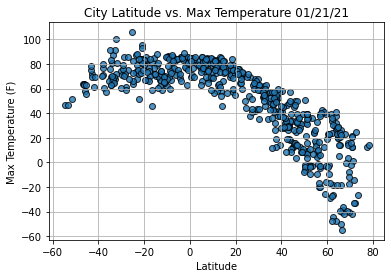

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

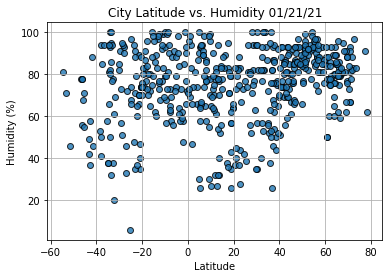

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

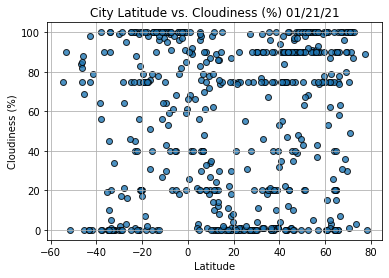

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")

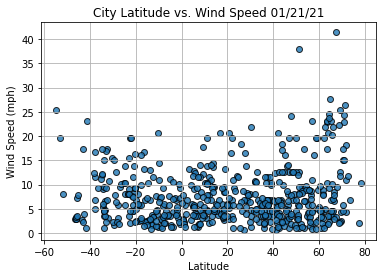

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")